Code Definitions

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Loading Iris Data

In [41]:
iris = load_iris()
X = iris.data # Use only the features

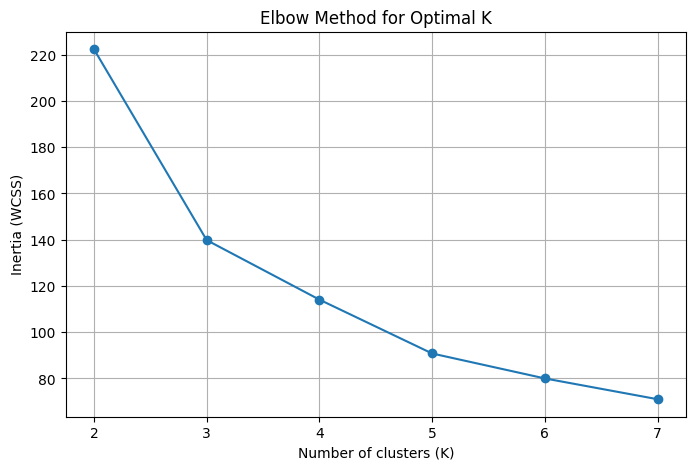

In [42]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Store inertia values for different K
inertias = []
K_values = range(2, 8)

# Run K-means for K = 2 to 7
for k in K_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=20, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_values, inertias, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia (WCSS)')
plt.grid(True)
plt.show()

In [43]:
y_true = iris.target
y_kmeans = kmeans.fit_predict(X_scaled)

1️⃣ Visualization (first two features)

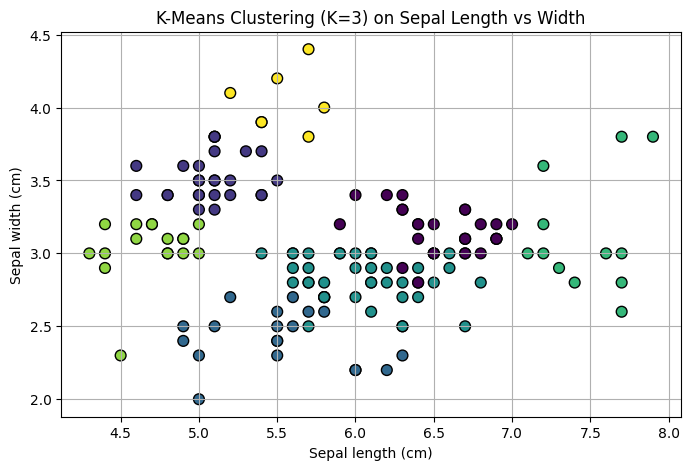

In [44]:
# Plotting the clusters with K=3 (as an example)
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', edgecolor='k', s=60)
plt.title('K-Means Clustering (K=3) on Sepal Length vs Width')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.grid(True)
plt.show()

 2️⃣ Visualization (true labels)

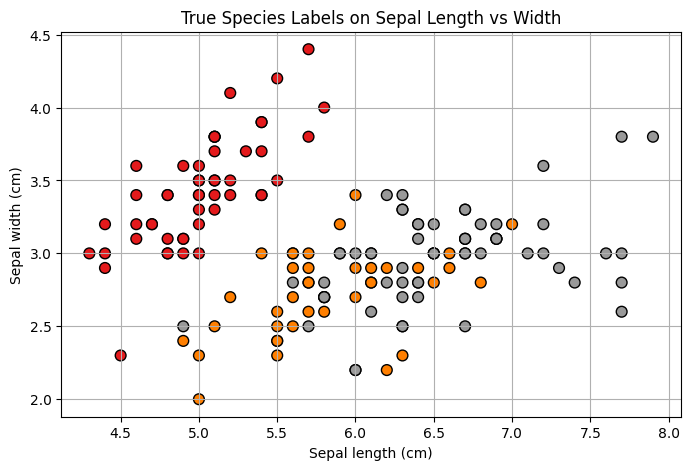

In [45]:

plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='Set1', edgecolor='k', s=60)
plt.title('True Species Labels on Sepal Length vs Width')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.grid(True)
plt.show()

3️⃣ Evaluation using Adjusted Rand Index

In [46]:
from sklearn.metrics import adjusted_rand_score
ari_score = adjusted_rand_score(y_true, y_kmeans)
print(f"Adjusted Rand Index (ARI): {ari_score:.4f}")

Adjusted Rand Index (ARI): 0.3204


simple Softmax classifier on the same dataset using cross-validation

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_true, test_size=0.3, random_state=42, stratify=y_true)

# Train Softmax classifier (multinomial logistic regression)
softmax_clf = LogisticRegression( solver='lbfgs', max_iter=500, random_state=42)
softmax_clf.fit(X_train, y_train)

# Evaluate on the test set
y_pred = softmax_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

# Cross-validation accuracy (optional)
cv_scores = cross_val_score(softmax_clf, X_scaled, y_true, cv=5)
print(f"Cross-validated Accuracy (5-fold): {cv_scores.mean():.4f}")

Test Set Accuracy: 0.9111

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45

Cross-validated Accuracy (5-fold): 0.9600


Here’s how the Softmax (multinomial logistic regression) classifier performed on the Iris dataset:

Test Set Accuracy: 91.11%

Precision/Recall/F1 scores are high across all three classes.

The confusion matrix shows only one misclassification (one Versicolor flower predicted as Virginica).